In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import math

%matplotlib inline
#style.use('seaborn')

In [3]:
tf.__version__

'2.2.0'

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1).astype('float32')
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Training Size:  60000
Testing Size:  10000


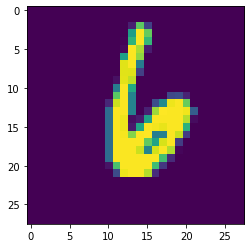

In [20]:
import random
print("Training Size: ", len(x_train))
print("Testing Size: ", len(x_test))
plt.imshow(x_train[random.randint(0,255)].reshape(28,28))

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28,1)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator

train_datagen = ImageDataGenerator()
test_datagen  = ImageDataGenerator()

batchSize = 200

train_generator = NumpyArrayIterator(x_train, y_train, train_datagen, batch_size=batchSize)

validation_generator =  NumpyArrayIterator(x_test,y_test, test_datagen, batch_size=batchSize)

model.compile(
    loss='sparse_categorical_crossentropy',
    #optimizer=tf.keras.optimizers.Adam(0.001),
    optimizer='adam',
    metrics=['accuracy'],
)

model.fit(train_generator, steps_per_epoch=len(x_train)/batchSize,verbose=1, epochs=10)

Epoch 1/10
300/300 [==============================] - 34s 115ms/step - loss: 0.1223 - accuracy: 0.9623
Epoch 2/10
300/300 [==============================] - 34s 112ms/step - loss: 0.0549 - accuracy: 0.9826
Epoch 3/10
300/300 [==============================] - 34s 114ms/step - loss: 0.0363 - accuracy: 0.9889
Epoch 4/10
300/300 [==============================] - 35s 116ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 5/10
300/300 [==============================] - 35s 118ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 6/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 7/10
300/300 [==============================] - 36s 118ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 8/10
300/300 [==============================] - 37s 122ms/step - loss: 0.0090 - accuracy: 0.9969
Epoch 9/10
300/300 [==============================] - 37s 122ms/step - loss: 0.0097 - accuracy: 0.9964
Epoch 10/10
300/300 [==============================] - 36s 119ms/step - l

In [26]:
val_loss, val_acc = model.evaluate(validation_generator)
print(val_loss, val_acc)

50/50 [==============================] - 1s 22ms/step - loss: 0.0501 - accuracy: 0.9893
0.05013984069228172 0.989300012588501


In [27]:
predictions = model.predict(validation_generator)

Index:  7718
Prediction:  8
Actual:  8


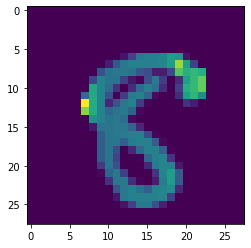

In [83]:
idx = random.randint(0,9500)
print("Index: ",idx)
print("Prediction: ", np.argmax(predictions[idx]))
print("Actual: ", y_test[idx])
plt.imshow(x_test[idx].reshape(28,28))

In [29]:
import tensorflowjs as tfjs
model.save('ocr.h5')
tfjs.converters.save_keras_model(model, 'model')

c:\users\nitis\documents\study\projectcb\venv\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [30]:
ocr_model = tf.keras.models.load_model('ocr.h5')

In [31]:
IMG_SIZE = 28
from skimage.transform import rescale, resize, downscale_local_mean

3

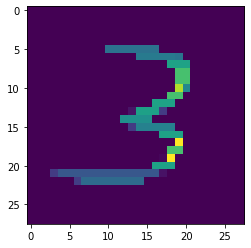

In [32]:
data = np.loadtxt('image.txt')
data = data.reshape(400,400)
image_resized = resize(data, (IMG_SIZE, IMG_SIZE), anti_aliasing=False)
image_resized = tf.keras.utils.normalize(image_resized, axis=1)
plt.imshow(image_resized)
image_resized = image_resized.reshape(1,IMG_SIZE,IMG_SIZE,1)
val = ocr_model.predict(image_resized)
np.argmax(val[0])